<a href="https://colab.research.google.com/github/feelsmandata/feelsmandata/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
#Import googledrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#read the file
path = ('/content/drive/MyDrive/Data Analyst Portfolio/superstore_sales.xlsx')

df = pd.read_excel(path)

In [10]:
df.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,2011
6,CA-2011-1510,2011-01-02,2011-01-06,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314.220,1,0.0,3.120,24.10,Medium,2011
7,IN-2011-79397,2011-01-03,2011-01-03,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276.102,1,0.1,110.412,125.32,Critical,2011
8,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.456,4,0.4,-319.464,107.10,Low,2011
9,IZ-2011-4680,2011-01-03,2011-01-07,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",666.840,4,0.0,253.320,81.26,High,2011


Q1. What is the overall sales trend?

Q2. Which are the Top 10 products by sales?

Q3. Which are the Most Selling Products?

Q4. Which is the most preferred Ship Mode?

Q5. Which are the Most Profitable Category and Sub-Category?


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [12]:
df.describe

<bound method NDFrame.describe of               order_id order_date  ship_date       ship_mode  \
0         AG-2011-2040 2011-01-01 2011-01-06  Standard Class   
1        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
2         HU-2011-1220 2011-01-01 2011-01-05    Second Class   
3      IT-2011-3647632 2011-01-01 2011-01-05    Second Class   
4        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
...                ...        ...        ...             ...   
51285   CA-2014-115427 2014-12-31 2015-01-04  Standard Class   
51286     MO-2014-2560 2014-12-31 2015-01-05  Standard Class   
51287   MX-2014-110527 2014-12-31 2015-01-02    Second Class   
51288   MX-2014-114783 2014-12-31 2015-01-06  Standard Class   
51289   CA-2014-156720 2014-12-31 2015-01-04  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consume

In [13]:
df.shape

(51290, 21)

In [21]:
print('The total rows on this project is:',df.shape[0])
print('The total columns on this project is:', df.shape[1])

The total rows on this project is: 51290
The total columns on this project is: 21


In [22]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [23]:
#Check if there is any missing values on our dataset
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [24]:
#Describe your dataset
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [25]:
#Lets check if the description is correct
df['profit'].max()

8399.975999999999

In [26]:
df['profit'].min()

-6599.978000000001

<H4> WHAT IS THE OVERALL SALESTREND? <H4>


In [28]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [29]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [30]:
#Getting month year from the dataset
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [35]:
#regroup the data into month_year
trend = df.groupby('month_year').sum()['sales'].reset_index()
trend

<ipython-input-35-c29b16e55538>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trend = df.groupby('month_year').sum()['sales'].reset_index()


,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


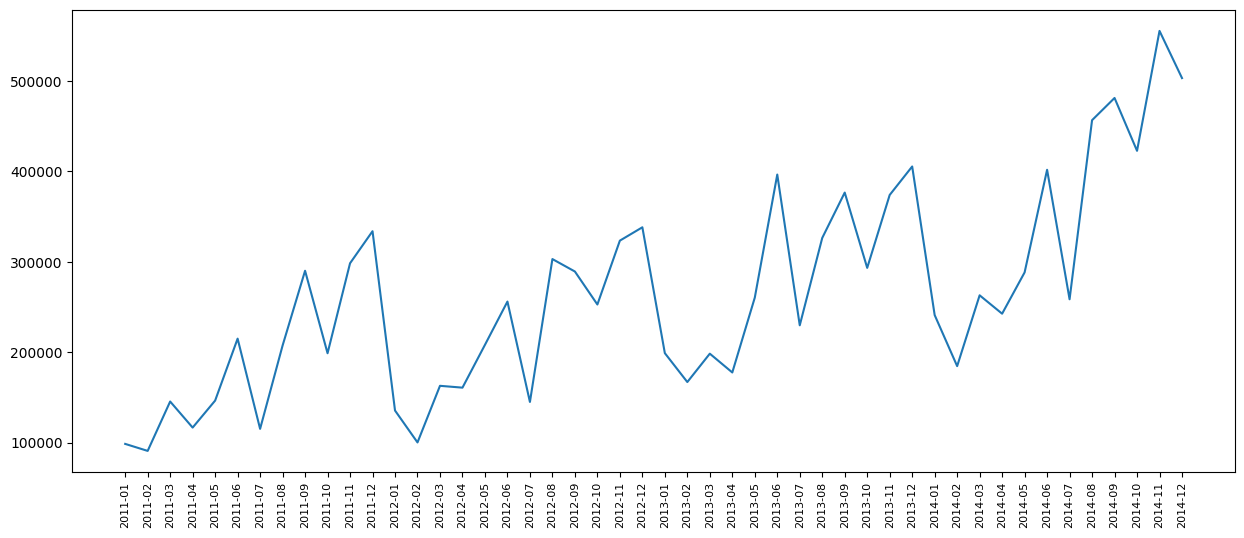

In [39]:
#Figure size
plt.figure(figsize = (15,6) )
plt.plot(trend['month_year'], trend['sales'])
plt.xticks(rotation='vertical', size = 8)
plt.show()

<h2> WHICH ARE THE TOP 10 PRODUCTS BY SALES? <h2>

In [49]:
#create dataframe as groupby which is the product_name using the sales column
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

<ipython-input-49-71ac9746dbdb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])


In [54]:
#Sorting the prod_sales
prod_sales = prod_sales.sort_values('sales', ascending = False)

In [57]:
# This " : " will show the whole rows available in the dataset and as for the [:10] it will show 10 columns
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<h4> WHICH ARE THE MOST SELLING PRODUCTS <h4>


In [62]:
#Grouping the product name
most_prod = pd.DataFrame(df.groupby('product_name').sum()['quantity'])


<ipython-input-62-4d7e8161e514>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_prod = pd.DataFrame(df.groupby('product_name').sum()['quantity'])


,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24
iOttie HLCRIO102 Car Mount,12
iOttie XL Car Mount,14


In [63]:
most_prod = most_prod.sort_values('quantity', ascending = False)

In [67]:
most_prod[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


<h4> WHAT IS THE MOST PREFERRED SHIP MODE? <h4>

In [96]:
import seaborn as sns
import numpy as np

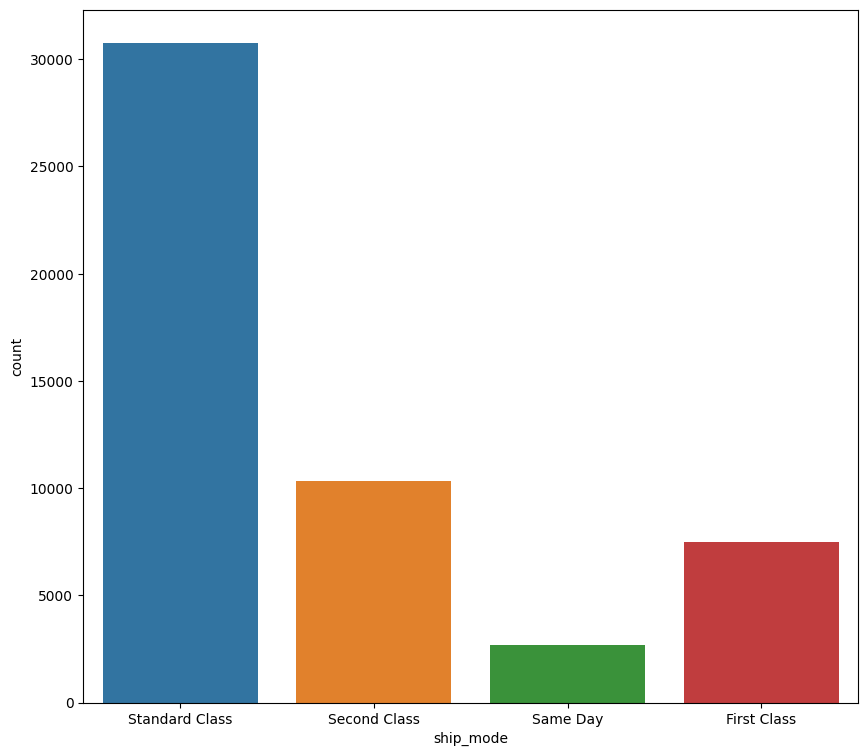

In [102]:
plt.figure(figsize = (10,9))
sns.countplot(x = df['ship_mode'] , data = df['ship_mode'])
plt.show()

<h4> WHAT IS THE MOST PROFITABLE CATEGORY AND SUBCATEGORY <h4>


In [107]:
#create a dataframe consisting category and sub by profits.
most_profit = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

<ipython-input-107-c88cd687fad3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_profit = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])


In [109]:
#sorting the values
most_profit.sort_values(['category','profit'], ascending = False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870